In [55]:
import cvxopt
from cvxopt import solvers
from cvxopt import matrix
import numpy as np
from scipy.linalg import null_space
import math
from sympy import Matrix
import sympy
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
b=2*math.log(2)-1
RZ1= [[1,    -b,   -b,     b**2, 1/2, -b/2,  1/2, -b/2, 1/4],
     [-b,    1,    b**2, -b,    1/2, -b/2, -b/2,  1/2, 1/4],
     [-b,    b**2, 1,    -b,   -b/2,  1/2,  1/2, -b/2, 1/4],
     [b**2, -b,   -b,     1,   -b/2,  1/2, -b/2,  1/2, 1/4],
     [1/2,   1/2, -b/2,  -b/2,  1,   -b,    1/4,  1/4, 1/2],
     [-b/2, -b/2,  1/2,   1/2, -b,    1,    1/4,  1/4, 1/2],
     [1/2,  -b/2,  1/2,  -b/2,  1/4,  1/4,  1,   -b,   1/2],
     [-b/2,  1/2, -b/2,   1/2,  1/4,  1/4, -b,    1,   1/2],
     [1/4,   1/4,  1/4,   1/4,  1/2,  1/2,  1/2,  1/2, 1  ]]
RZ=matrix(RZ1)

In [57]:
RZ

<9x9 matrix, tc='d'>

In [58]:
import numpy as np

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [59]:
is_pos_def(RZ)

True

### Using the constraint used by RZ

In [47]:
q=matrix([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
A=matrix([[1.0,1.0],[-b,-1.0],[-b,-1.0],[1.0,1.0],[1/2,0.0],[1/2,0.0],[1/2,0.0],[1/2,0.0],[1.0,0.0]])
B=matrix([1.0,0.0])

In [48]:
A

<2x9 matrix, tc='d'>

In [49]:
B

<2x1 matrix, tc='d'>

In [50]:
sol= solvers.qp(P=RZ,q=q,A=A,b=B)
sol

{'status': 'optimal',
 'x': <9x1 matrix, tc='d'>,
 'y': <2x1 matrix, tc='d'>,
 'z': <0x1 matrix, tc='d'>,
 's': <0x1 matrix, tc='d'>,
 'gap': 0.0,
 'relgap': 0.0,
 'primal objective': 0.2500000000000002,
 'dual objective': 0.2500000000000002,
 'primal slack': 0.0,
 'dual slack': 0.0,
 'primal infeasibility': 1.6011864169946884e-15,
 'dual infeasibility': 1.2953262784141144e-15,
 'iterations': 0}

In [51]:
Results=[]
for i in range(0,len(sol['x'])):
    Results.append(float(sol['x'][i]))

Results

[2.198659648389105,
 2.1986596483891065,
 2.198659648389107,
 2.1986596483891074,
 -2.19865964838911,
 -2.1986596483891114,
 -2.19865964838911,
 -2.1986596483891114,
 2.698659648389114]

In [52]:
1/(2*(1-2*b))

2.1986596483891057

In [53]:
A1=matrix([[1.0,1.0,b],[-b,-1.0,-1.0],[-b,-1.0,-1.0],[1.0,1.0,b],[1/2,0.0,-0.5],[1/2,0.0,-0.5],[1/2,0.0,-0.5],[1/2,0.0,-0.5],[1.0,0.0,-1.0]])
B1=matrix([1.0,0.0,-1.0])

In [54]:
sol1= solvers.qp(P=RZ,q=q,A=A1,b=B1)
sol1

{'status': 'optimal',
 'x': <9x1 matrix, tc='d'>,
 'y': <3x1 matrix, tc='d'>,
 'z': <0x1 matrix, tc='d'>,
 's': <0x1 matrix, tc='d'>,
 'gap': 0.0,
 'relgap': 0.0,
 'primal objective': 0.25000000000000955,
 'dual objective': 0.25000000000000955,
 'primal slack': 0.0,
 'dual slack': 0.0,
 'primal infeasibility': 2.834875741886945e-14,
 'dual infeasibility': 2.0520814115631265e-14,
 'iterations': 0}

In [55]:
Results1=[]
for i in range(0,len(sol1['x'])):
    Results1.append(float(sol1['x'][i]))

Results1

[2.1986596483890923,
 2.19865964838912,
 2.1986596483891345,
 2.19865964838914,
 -2.198659648389113,
 -2.1986596483891434,
 -2.1986596483891034,
 -2.1986596483891176,
 2.6986596483891314]

In [56]:
A2=matrix([[1.0],[-b],[-b],[1.0],[1/2],[1/2],[1/2],[1/2],[1.0]])
B2=matrix([1.0])

In [58]:
sol2= solvers.qp(P=RZ,q=q,A=A2,b=B2)
sol2

{'status': 'optimal',
 'x': <9x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 'z': <0x1 matrix, tc='d'>,
 's': <0x1 matrix, tc='d'>,
 'gap': 0.0,
 'relgap': 0.0,
 'primal objective': 0.16666666666666685,
 'dual objective': 0.16666666666666685,
 'primal slack': 0.0,
 'dual slack': 0.0,
 'primal infeasibility': 2.220446049250313e-16,
 'dual infeasibility': 1.0355470984145593e-15,
 'iterations': 0}

In [60]:
Results2=[]
for i in range(0,len(sol2['x'])):
    Results2.append(float(sol2['x'][i]))

Results2

[1.5859976856668183,
 1.3455485121853257,
 1.3455485121853252,
 1.5859976856668203,
 -1.4657730989260747,
 -1.4657730989260755,
 -1.4657730989260747,
 -1.4657730989260755,
 1.7991064322594108]

In [62]:
A3=matrix([[1.0],[-1.0],[-1.0],[1.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
B3=matrix([0.0])

In [63]:
sol3= solvers.qp(P=RZ,q=q,A=A3,b=B3)
sol3

{'status': 'optimal',
 'x': <9x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 'z': <0x1 matrix, tc='d'>,
 's': <0x1 matrix, tc='d'>,
 'gap': 0.0,
 'relgap': 0.0,
 'primal objective': 0.0,
 'dual objective': 0.0,
 'primal slack': 0.0,
 'dual slack': 0.0,
 'primal infeasibility': 0.0,
 'dual infeasibility': 0.0,
 'iterations': 0}

In [65]:
Results3=[]
for i in range(0,len(sol3['x'])):
    Results3.append(float(sol3['x'][i]))

Results3

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [66]:
A4=matrix([[b],[-1.0],[-1.0],[b],[-0.5],[-0.5],[-0.5],[-0.5],[-1.0]])
B4=matrix([-1.0])

In [67]:
sol4= solvers.qp(P=RZ,q=q,A=A4,b=B4)
sol4

{'status': 'optimal',
 'x': <9x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 'z': <0x1 matrix, tc='d'>,
 's': <0x1 matrix, tc='d'>,
 'gap': 0.0,
 'relgap': 0.0,
 'primal objective': 0.1666666666666666,
 'dual objective': 0.1666666666666666,
 'primal slack': 0.0,
 'dual slack': 0.0,
 'primal infeasibility': 2.220446049250313e-16,
 'dual infeasibility': 9.371360918460988e-16,
 'iterations': 0}

In [68]:
Results4=[]
for i in range(0,len(sol4['x'])):
    Results4.append(float(sol4['x'][i]))

Results4

[1.3455485121853248,
 1.5859976856668188,
 1.5859976856668192,
 1.3455485121853263,
 -1.4657730989260747,
 -1.4657730989260755,
 -1.4657730989260747,
 -1.4657730989260755,
 1.7991064322594112]

In [69]:
A5=matrix([[1.0,b],[-1.0,-1.0],[-1.0,-1.0],[1.0,b],[0.0,-0.5],[0.0,-0.5],[0.0,-0.5],[0.0,-0.5],[0.0,-1.0]])
B5=matrix([0.0,-1.0])

In [70]:
sol5= solvers.qp(P=RZ,q=q,A=A5,b=B5)
sol5

{'status': 'optimal',
 'x': <9x1 matrix, tc='d'>,
 'y': <2x1 matrix, tc='d'>,
 'z': <0x1 matrix, tc='d'>,
 's': <0x1 matrix, tc='d'>,
 'gap': 0.0,
 'relgap': 0.0,
 'primal objective': 0.24999999999999847,
 'dual objective': 0.24999999999999847,
 'primal slack': 0.0,
 'dual slack': 0.0,
 'primal infeasibility': 4.440892098500626e-16,
 'dual infeasibility': 1.0590852655056278e-15,
 'iterations': 0}

In [71]:
Results5=[]
for i in range(0,len(sol5['x'])):
    Results5.append(float(sol5['x'][i]))

Results5

[2.1986596483891065,
 2.1986596483891074,
 2.1986596483891074,
 2.1986596483891088,
 -2.1986596483891105,
 -2.198659648389112,
 -2.19865964838911,
 -2.1986596483891114,
 2.698659648389114]

In [72]:
sol6= solvers.qp(P=RZ,q=q)
sol6

{'status': 'optimal',
 'x': <9x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 'z': <0x1 matrix, tc='d'>,
 's': <0x1 matrix, tc='d'>,
 'gap': 0.0,
 'relgap': 0.0,
 'primal objective': 0.0,
 'dual objective': 0.0,
 'primal slack': 0.0,
 'dual slack': 0.0,
 'primal infeasibility': 0.0,
 'dual infeasibility': 0.0,
 'iterations': 0}

In [73]:
Results6=[]
for i in range(0,len(sol6['x'])):
    Results6.append(float(sol6['x'][i]))

Results6

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [72]:
def Brownian(N,days):
    W=[]
    b=np.random.normal(0.0,1/N,days*N)
    W.append(10)
    W.extend(b)
    W=np.cumsum(W)
    return W , b

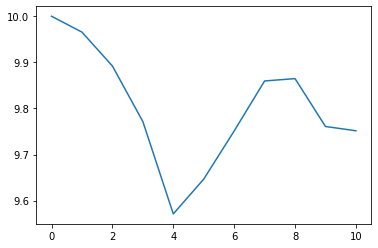

In [80]:
W=Brownian(10,1)[0]
plt.plot(W)


In [81]:
W.max()


10.0

In [82]:
W.min()

9.571130468252347

In [97]:
T = 1.0
N = 200000
dt = T/(N-1)
dX = np.sqrt(dt) * np.random.randn(1,N)
X = np.cumsum(dX)

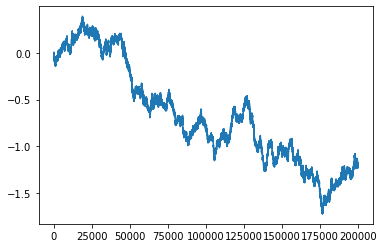

In [98]:
plt.plot(X)

In [ ]:
np.random.randn()

In [3]:
# function for simulating weiner/brownian process 
def Brownian(seed, N,days):
    """
    N is the number of time steps in a day
    days is the total # of days
    """
    np.random.seed(seed)
    # seed also modeled so that the simulation has same random #numbers during multiiple run
    b = np.random.normal(0.,1.,days*N)*np.sqrt(1/N)
    # brownian increments , variance is considered to be 1/N CHECK? 
    W = np.cumsum(b)
    W=np.insert(W,0,0.)
    # brownian path
    return W, b

In [5]:
 # geometric brownian motion function 
def GBM(So, mu, sigma, W, N,days):
    """
    So :is the start price
    mu :is mean of price
    sigma: is the volatility
    N :is the number of time steps in a day days: is the total # of days
    """
    S = []
    S.append(So)
    t=t = np.linspace(0.,1.,N+1)
    for i in range(1,int(days*N+1)):
        drift = (mu - 0.5 * sigma**2) * 1/N
        #CHECK if the formula of the process is correct 
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion) 
        S.append(S_temp)
    return S

In [6]:
def generate_gbm_prices(start_price,instance,N,days,mu,sigma):
    """
    start_price: is the initial price same as So as above instance: are number of simulations you want increments: are increments in a day, same as N above days: # of total no of trading days
    """
    ins=instance
    prices=pd.DataFrame()
    for i in range(1,ins+1):
        seed=i
        W=Brownian(seed,N,days)[0] #here what to put BM or increments 
        So=start_price
        temp=GBM(So,mu,sigma,W,N,days) 
        prices=pd.concat([prices,pd.Series(temp)],axis=1)
    prices.columns=np.arange(1,ins+1,1) 
    return prices 

In [61]:
soln=generate_gbm_prices(55.25,1,2**6,100,0,1)#sample size is taken to be small #for illustration

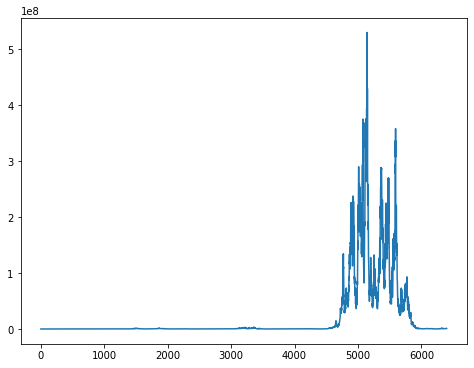

In [62]:
plt.figure(figsize=(8,6))
plt.plot(soln)
plt.show()

In [63]:
 #the below function labels the data properly 
def give_labels(N,days,data):
    obs_nu = np.arange(0,N+1) 
    final_prices=pd.DataFrame() 
    for i in range(1,days+1):
        temp_ = data.loc[N*(i-1):N*i] 
        day_label=[]
        for j in range(N+1):
            day_label.append('day'+str(i))
        tuples=list(zip(day_label,obs_nu))
        index=pd.MultiIndex.from_tuples(tuples,names=['DAY','#INCREMENT'])
        temp_1=pd.DataFrame(temp_.values,index=index)
        final_prices=pd.concat([final_prices,temp_1])
    return final_prices

In [64]:
ac_w_lab= give_labels(2**6,100,soln)
ac_w_lab

0
DAY    #INCREMENT               
day1   0               55.250000
       1               54.820041
       2               67.161422
       3               62.217074
       4               58.242073
       5               50.931771
       6               56.750409
       7               42.562370
       8               52.935384
       9               48.130744
       10              50.088980
       11              48.551725
       12              58.287824
       13              45.054624
       14              43.274930
       15              41.246518
       16              47.526520
       17              41.421557
       18              40.538329
       19              36.325342
       20              36.517527
       21              39.277202
       22              34.228781
       23              39.494338
       24              44.205807
       25              47.071511
       26              52.682058
       27              48.366574
       28              47.629279
       29              42.371523
...                          ...
day100 35          613195.006476
       36          618906.172785
       37          607156.315276
       38          684020.773595
       39          638970.223339
       40          571512.568855
       41          617756.465016
       42          564098.433625
       43          623856.288483
       44          701708.980809
       45          681289.286072
       46          629931.424145
       47          648725.461977
       48          640427.383384
       49          568326.559658
       50          561151.778679
       51          546290.003681
       52          524698.250196
       53          533107.980950
       54          711821.686133
       55          602344.847558
       56          563001.470771
       57          527713.518198
       58          624997.085759
       59          642999.719101
       60          685127.263581
       61          793800.795415
       62          629728.266395
       63          845056.560112
       64          965777.386203

[6500 rows x 1 columns]

In [65]:
def ochl_data(instances,N,days,data): 
    data_fin=pd.DataFrame()
    zz=data
    for i in range(instances):
        for j in range(1,days+1): 
            temp=pd.DataFrame({'OPEN':zz.loc['day'+str(j)][i][0],
                                            "CLOSE":zz.loc['day'+str(j)][i][N],
                                         'HIGH':max(zz.loc['day'+str(j)][i]),
                                        'LOW': min(zz.loc['day'+str(j)][i])},
                                 index=pd.MultiIndex.from_tuples([('Simulation'+str(i+1),
                                     'day'+str(j))],names=['Simulation#','DAY']))
            data_fin=pd.concat([data_fin,temp]) 
    return data_fin

In [66]:
final=ochl_data(1,2**6,100,ac_w_lab)

In [67]:
final

OPEN         CLOSE          HIGH           LOW
Simulation# DAY                                                           
Simulation1 day1    5.525000e+01  6.621045e+01  6.716142e+01  2.519217e+01
            day2    6.621045e+01  1.444346e+02  1.459330e+02  6.378874e+01
            day3    1.444346e+02  4.072488e+02  4.072488e+02  1.123058e+02
            day4    4.072488e+02  5.211598e+02  1.223913e+03  3.907524e+02
            day5    5.211598e+02  1.765615e+03  1.945653e+03  4.573656e+02
            day6    1.765615e+03  7.396708e+02  2.426944e+03  5.107953e+02
            day7    7.396708e+02  1.245160e+03  1.657904e+03  4.316694e+02
            day8    1.245160e+03  1.258658e+03  3.113805e+03  9.500990e+02
            day9    1.258658e+03  3.632729e+03  3.884102e+03  1.021420e+03
            day10   3.632729e+03  3.862313e+03  7.433374e+03  3.391640e+03
            day11   3.862313e+03  3.795160e+03  5.663874e+03  2.267892e+03
            day12   3.795160e+03  1.977636e+03  4.971940e+03  1.761734e+03
            day13   1.977636e+03  1.653723e+03  2.110708e+03  8.868531e+02
            day14   1.653723e+03  5.820320e+03  1.076484e+04  1.653723e+03
            day15   5.820320e+03  1.701281e+04  1.701281e+04  3.858953e+03
            day16   1.701281e+04  2.648820e+03  2.119233e+04  2.648820e+03
            day17   2.648820e+03  8.388081e+03  9.043333e+03  2.491133e+03
            day18   8.388081e+03  5.031746e+03  1.376286e+04  5.031746e+03
            day19   5.031746e+03  3.899722e+03  7.372310e+03  2.277506e+03
            day20   3.899722e+03  2.382656e+04  2.490357e+04  3.463477e+03
            day21   2.382656e+04  6.845816e+04  7.156681e+04  2.148319e+04
            day22   6.845816e+04  1.109397e+05  1.169924e+05  4.944101e+04
            day23   1.109397e+05  4.450455e+05  9.373752e+05  9.721553e+04
            day24   4.450455e+05  4.092658e+05  1.282330e+06  4.000730e+05
            day25   4.092658e+05  1.927995e+05  7.643254e+05  1.635769e+05
            day26   1.927995e+05  6.534554e+04  2.445143e+05  4.850110e+04
            day27   6.534554e+04  6.238435e+04  1.724507e+05  5.491469e+04
            day28   6.238435e+04  1.577083e+05  1.577083e+05  6.238435e+04
            day29   1.577083e+05  7.396941e+05  1.003264e+06  1.577083e+05
            day30   7.396941e+05  3.988528e+05  1.825202e+06  3.318119e+05
...                          ...           ...           ...           ...
            day71   2.521829e+05  1.220980e+06  1.259727e+06  2.377231e+05
            day72   1.220980e+06  3.245243e+06  3.245243e+06  1.055113e+06
            day73   3.245243e+06  6.079315e+06  1.458399e+07  2.648256e+06
            day74   6.079315e+06  3.329448e+07  3.702925e+07  3.071155e+06
            day75   3.329448e+07  3.869553e+07  1.343974e+08  2.886973e+07
            day76   3.869553e+07  1.254817e+08  1.254817e+08  3.627131e+07
            day77   1.254817e+08  2.038801e+08  2.375633e+08  1.066513e+08
            day78   2.038801e+08  7.970753e+07  2.279943e+08  3.628691e+07
            day79   7.970753e+07  1.339350e+08  2.897254e+08  7.908160e+07
            day80   1.339350e+08  3.335307e+08  3.750071e+08  8.211229e+07
            day81   3.335307e+08  6.713426e+07  5.297475e+08  4.952001e+07
            day82   6.713426e+07  6.930331e+07  1.276232e+08  3.799422e+07
            day83   6.930331e+07  5.215166e+07  1.323082e+08  3.604066e+07
            day84   5.215166e+07  2.444965e+08  2.883635e+08  4.985442e+07
            day85   2.444965e+08  1.602792e+08  2.444965e+08  7.188818e+07
            day86   1.602792e+08  7.624423e+07  2.699678e+08  7.291115e+07
            day87   7.624423e+07  1.146264e+08  1.614233e+08  4.471087e+07
            day88   1.146264e+08  4.115540e+07  3.580561e+08  4.096209e+07
            day89   4.115540e+07  4.145160e+07  7.307054e+07  2.460800e+07
            day90   4.145160e+07  5.699853e+07  8.176435e+07  3.049484e+07
            day91   5.699853e+07  2.582582e+07  9.309

In [54]:
final.to_excel("final2.xlsx")